# Eigen Faces

Face recognition using Principal Componnent Analysis (PCA)

## Packages

In [2]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

## Load dataset

Load the Olivetti faces data-set from AT&T. The dataset contains :
- 40 identities
- 400 images
- image size is 64x64 (4096 pixels)
- image pixel values are normalized

$$X=
\begin{bmatrix}
- & x_{1} & - \\ 
- & \dots  &- \\ 
- & x_{k} &- 
\end{bmatrix} \in \mathbb{R}^{400 \times 4096}$$

$$y = 
\begin{bmatrix} y_{1} \\  \dots \\  y_{400} 
\end{bmatrix} \in \mathbb{Z}^{400}$$


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
There are 40 unique faces
There are 400 faces
The single image size is (64, 64) 
The data range is [0.0,1.0]
X shape is (400, 4096)
y shape is (400,)


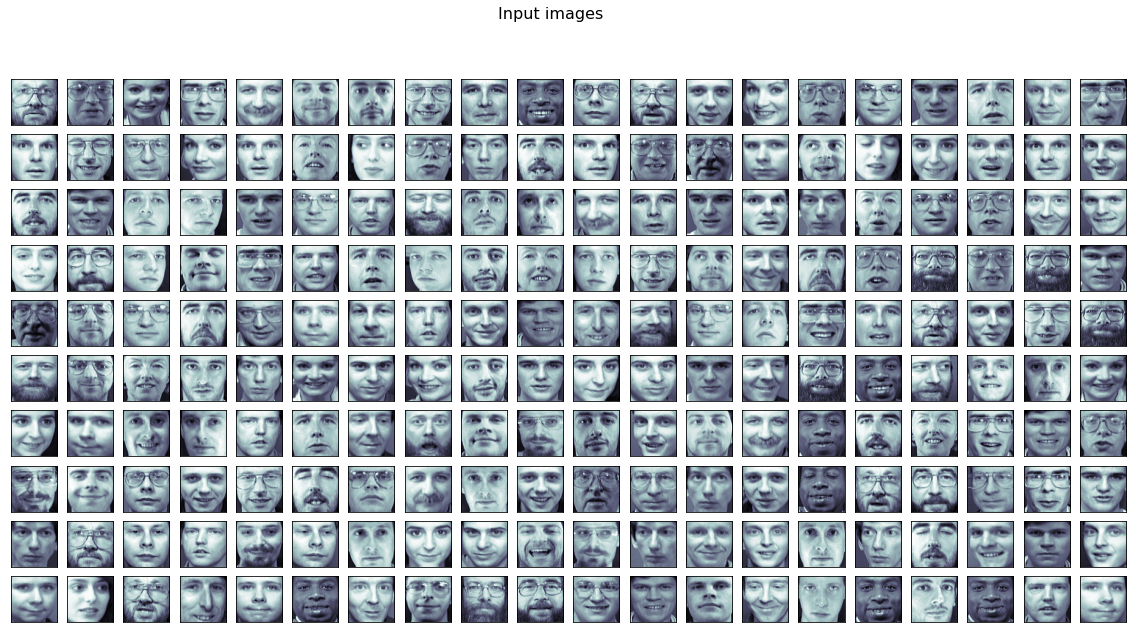

In [3]:
# Load dataset
bunch = datasets.fetch_olivetti_faces(return_X_y=False, shuffle=True)
X = bunch.data
y = bunch.target

NUM_EXAMPLES = X.shape[0]
NUM_UNIQUE_FACES = len(np.unique(y))
IMAGE_SHAPE = bunch.images.shape[1:]

# Print dataset informations 
print("There are {} unique faces".format(NUM_UNIQUE_FACES))
print("There are {} faces".format(NUM_EXAMPLES))
print("The single image size is {} ".format(IMAGE_SHAPE))
print("The data range is [{},{}]".format(np.min(X), np.max(X)))
print("X shape is {}".format(X.shape))
print("y shape is {}".format(y.shape))

# Visualize few faces
def show_images(data_x, title = None):
    fig = plt.figure(figsize=(20, 10))
    if title is not None:
        fig.suptitle(title, fontsize=16)
    for i in range(200):
        ax = fig.add_subplot(10, 20, i + 1, xticks=[], yticks=[])
        image = data_x[i].reshape(IMAGE_SHAPE)
        ax.imshow(image, cmap=plt.cm.bone)

show_images(X, 'Input images')

## Visualize Identity

Visualize images per identity 

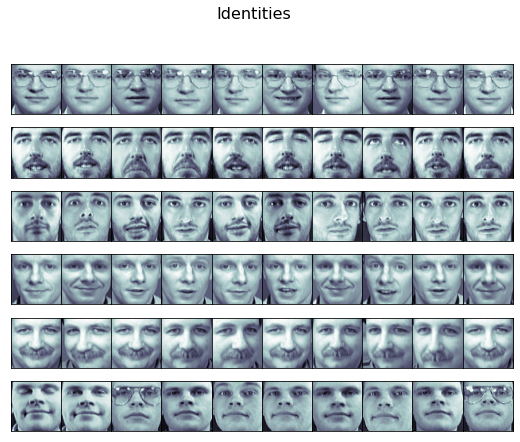

In [4]:
def show_identity(data_x, identities):
    fig = plt.figure(figsize=(9, 7))
    fig.subplots_adjust(wspace=0, hspace=0)
    fig.suptitle('Identities', fontsize=16)
    i = 0
    for identity in identities:
        ids = np.argwhere(y == identity).flatten()
        for idx in range(10):
            ax = fig.add_subplot(len(identities), 10, i + 1, xticks=[], yticks=[])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')
            image = data_x[ids[idx]].reshape(IMAGE_SHAPE)
            ax.imshow(image, cmap=plt.cm.bone)
            i = i + 1
    plt.show()
    
show_identity(X, identities = [5, 10, 15, 20, 24, 35])

## Split Training and Test set

We can generate the input and output for the **Training Set** and **Test Set** fron $X$ and $y$.

$$X = \begin{bmatrix}
X_{train}\\ 
\hline X_{test} 
\end{bmatrix} \in \mathbb{R}^{40 \times 4096}$$

$$y = \begin{bmatrix}
y_{train}\\ 
\hline y_{test} 
\end{bmatrix} \in \mathbb{Z}^{40}$$

**Training Set** : with $M$ the number of training examples 

$$X_{train}=
\begin{bmatrix}
- & x_{1} & - \\ 
- & \dots  &- \\ 
- & x_{m} &- 
\end{bmatrix} \in \mathbb{R}^{m \times 4096}$$

$$y_{train} = 
\begin{bmatrix} y_{1} \\  \dots \\  y_{m} 
\end{bmatrix} \in \mathbb{Z}^{m}$$

**Test Set** : with $N$ the number of test examples 

$$X_{test}=
\begin{bmatrix}
- & x_{1} & - \\ 
- & \dots  &- \\ 
- & x_{n} &- 
\end{bmatrix} \in \mathbb{R}^{n \times 4096}$$ 
$$y_{test} = 
\begin{bmatrix} y_{1} \\  \dots \\  y_{n} 
\end{bmatrix} \in \mathbb{Z}^{n}$$

 

In [5]:
# TODO : split better to garantuee all the faces
PERCENTAGE_TRAIN = 0.9
NUM_TRAIN_EXAMPLES = int(NUM_EXAMPLES * PERCENTAGE_TRAIN)
NUM_TEST_EXAMPLES = NUM_EXAMPLES - NUM_TRAIN_EXAMPLES

X_train = X[:NUM_TRAIN_EXAMPLES]
y_train = y[:NUM_TRAIN_EXAMPLES]
X_test = X[NUM_TRAIN_EXAMPLES:]
y_test = y[NUM_TRAIN_EXAMPLES:]

print("We are using {}% of the dataset for training".format(PERCENTAGE_TRAIN * 100))
print("There X_train shape is {}".format(X_train.shape))
print("There y_train shape is {}".format(y_train.shape))
print("There X_test shape is {}".format(X_test.shape))
print("There y_test shape is {}".format(y_test.shape))
print("The y_train includes all the faces : {}".format(len(np.unique(y_train))==NUM_UNIQUE_FACES))

We are using 90.0% of the dataset for training
There X_train shape is (360, 4096)
There y_train shape is (360,)
There X_test shape is (40, 4096)
There y_test shape is (40,)
The y_train includes all the faces : True


## Face Space (Training)

We are converting the images into a new space called the **facespace**. The face space is computed by using the Principal Component Analysis (PCA).


1.   In $X$, The face images should be scaled and aligned correctly, and the backgrounds should be consistent or removed.
2.   Mean centering of $X$ by removing the average face (called $A$)
3.   The covariance matrix $C=AA^{T} \in \mathbb{R}^{4096 \times 4096}$
4.   Determining the eigenvectors and eigenvalues of $C$
4.   Project images into the **face space**




### Mean centering

We are centering the data of $X_{train}$ into a new matrix $A$ by substracting the **average face** $\Psi$.
$$\Psi = \frac{1}{M} \sum_{i=1}^{M} x_{i}$$

$$A = \begin{bmatrix}
\vert & \vert & \vert \\ 
x_{1} - \Psi & \dots  & x_{m} - \Psi \\ 
\vert & \vert & \vert 
\end{bmatrix} \in \mathbb{R}^{4096 \times m}$$


The size of A is (4096, 360)


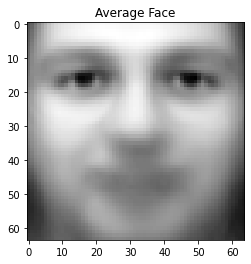

In [6]:
MEAN = np.mean(X_train, axis=0) 
A = X_train.transpose()
A = A - MEAN[:,np.newaxis]
print("The size of A is {}".format(A.shape))

ax = plt.subplot()
ax.set_title('Average Face')
image = MEAN.reshape(IMAGE_SHAPE)
img = ax.imshow(image)
img.set_cmap('gray')
plt.show()

### Covariance matrix

We build the covariance matrix **$C=AA^{T}$** where each column of $A$ contains one mean-centered flattened image. The eigenvectors of the covariance matrix $C$ are called **eigenfaces**. The eigenvalue decomposition is used to compute the eigen vectors. $$Cv_{i}=AA^{T}v_{i}=\lambda_{i}v_{i}$$

### Optimization

However $C$ is a large matrix where $4096 \gg m$. For instance, the *Olivetti faces dataset* has 400 examples of 64x64 images which results into a 4096x4906 covariance matrix. Turk and Pentland [2] introduced a method to obtain the eigenvalues and eigenvectors of C by studying a much smaller matrix. 

1. Consider $A^{T}A \in \mathbb{R}^{m \times m} $
2. Compute the eigenvectors $u_i$ of $A^{T}A$ : $A^{T}Au_{i}=\lambda_{i}u_{i}$
3. in the original $AA^{T}$ Replacing $v_{i}=Au_{i}$, we get $AA^{T}Au_{i}=\lambda_{i}Au_{i}$. This new formulation means when $u_{i}$ is an eigenvector of $A^{T}A$ then $v_{i}=Au_{i}$ is an eigenvector of $AA^{T}$
4. Compute and normalize the $M$ best eigenvectors of $AA^T$ : with $v_i = A u_i $ 
5. Stack the eigenvectors in a matrix $Q$ called **eigenfaces**

The eigenfaces $Q$ are :

$$Q=\begin{bmatrix}
\vert & \vert & \vert \\ 
v_{1} & \dots & v_{n} \\ 
\vert & \vert & \vert
\end{bmatrix} \in \mathbb{R}^{4096 \times m}$$

eigen_faces shapes (4096, 360)


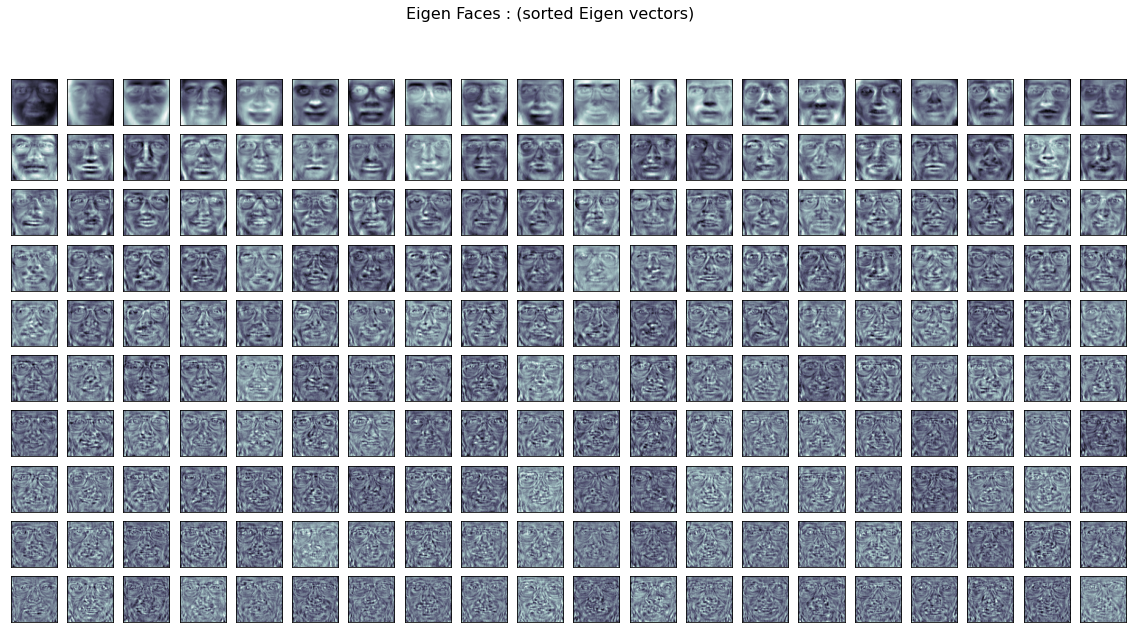

In [7]:
# Computes the eigen vectors
Cu = np.dot(A.T,A)
eigen_values, eigen_vectors = np.linalg.eig(Cu)
eigen_vectors = np.dot(A, eigen_vectors)

# Normalize eigenvectors - improve detection and reconstruction
inv_norms = 1.0 / np.linalg.norm(eigen_vectors, axis=0)
eigen_vectors = np.multiply(eigen_vectors, inv_norms)

# Sort the eigen vectors and eigen values
# The eigen faces are the eigen vectors
idx = eigen_values.argsort() # sort from low to high
idx = idx[::-1] #  reverse the order (from high to low)
eigen_values = eigen_values[idx]
eigen_faces = eigen_vectors[:,idx]

# Show Eigen Faces
show_images(eigen_faces.T, 'Eigen Faces : (sorted Eigen vectors)')

# Show the eigenfaces
print('eigen_faces shapes {}'.format(eigen_faces.shape))

### Reduced FaceSpace

We compute the number of components to maintain 85% of total variances.

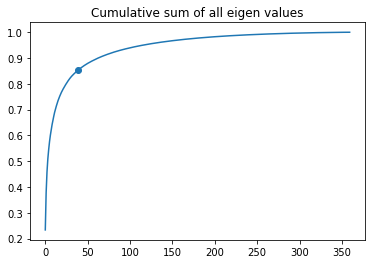

There are 39 components to keep 85% total variance


In [8]:
# Computes the number of principal components to keep 85% total variance
cumulative_values = np.cumsum(eigen_values) / np.sum(eigen_values)
num_components = 1
while cumulative_values[num_components-1] < 0.85:
    num_components += 1

ax = plt.subplot()
ax.scatter(num_components,cumulative_values[num_components])
ax.plot(cumulative_values)
plt.title('Cumulative sum of all eigen values')
plt.show()
print('There are {} components to keep 85% total variance'.format(num_components))

The eigen faces $Q$ are reduced into $R$ to keep the most relevant eigenvectors associated with the most significant eigenvalues.

$$R=\begin{bmatrix}
\vert & \vert & \vert \\ 
v_{1} & \dots & v_{r} \\ 
\vert & \vert & \vert
\end{bmatrix} \in \mathbb{R}^{4096 \times r}$$

In [9]:
# Reduce the eigenfaces
reduced_eigen_faces = eigen_faces[:,:num_components]
print("The size of the reduced eigen matrix is {}".format(reduced_eigen_faces.shape))

The size of the reduced eigen matrix is (4096, 39)


### Build model (weights computation)

Computes the face weights $W$ by using the input data $A$ and the reduced face space $R$. $W$ is a compressed version of the original dataset.

$$W = A^{T} R$$

$$W=
\begin{bmatrix}
- & w_{1} & - \\ 
- & \dots  &- \\ 
- & w_{m} &- 
\end{bmatrix} \in \mathbb{R}^{m \times r}$$


In [10]:
# Project the image vector (stored in A) onto the eigen faces
face_weights = np.dot(A.T, reduced_eigen_faces)
print("The size of the face weights matrix is {}".format(face_weights.shape))

The size of the face weights matrix is (360, 39)


### Evaluate FaceSpace

In [11]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(1, 2)
num_component_arrays = range(1, reduced_eigen_faces.shape[1], 5)
def update_build_face_from_components(component_id):
  identity = 18
  num_components = num_component_arrays[component_id]
  face = np.dot(face_weights[identity][:num_components], eigen_faces[:,:num_components].T)
  face = MEAN + face
  ax[0].set_title('Num component {}'.format(num_components))
  ax[0].imshow(face.reshape(IMAGE_SHAPE))
  ax[1].set_title('Input Data')
  ax[1].imshow((A[:,identity]+MEAN).reshape(IMAGE_SHAPE))

plt.set_cmap('gray')
plt.close()

anim = FuncAnimation(fig, update_build_face_from_components, frames=len(num_component_arrays), interval=40)
HTML(anim.to_jshtml())

## Facial recognition (Prediction)

Load a single image from the test data and try to predict its identity ID.

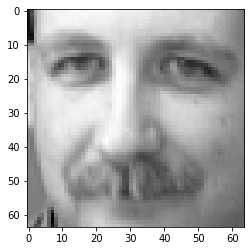

The Face ID is 24


In [12]:
IMAGE_TEST_INDEX = 10

def show_single_image(image_vector):
    ax = plt.subplot()
    image = image_vector.reshape(IMAGE_SHAPE)
    img = ax.imshow(image)
    img.set_cmap('gray')
    plt.show()

show_single_image(X_test[IMAGE_TEST_INDEX])
print("The Face ID is {}".format(y_test[IMAGE_TEST_INDEX]))

The **test face** is projected into the **face space** and compared with the euclidean distance of the weights. The closest neighbors. Other classifers could be used and provide a better prediction.

*   K-Nearest Neighbors
*   Decision Tree/Random Forest
*   Support vector machines (SVMs)
*   ...



The input face id is 24
The predicted face is 24


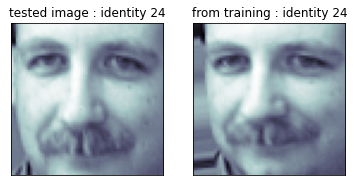

In [13]:
def predict_face_id(test_face_idx):
    # Compute the weights for the test face
    face_to_test = X_test[test_face_idx] - MEAN
    face_weight = np.dot(face_to_test.T, reduced_eigen_faces)

    # Compute the euclidean distance between face_weight and face_weights
    euclidean_distance = np.linalg.norm(face_weights - face_weight, axis=1)
    closest_face_index = np.argmin(euclidean_distance)
    return y_train[closest_face_index], closest_face_index

def show_prediction(test_face_idx, predicted_face_idx):
    fig = plt.figure()

    # test image
    ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    image = X_test[test_face_idx].reshape(IMAGE_SHAPE)
    ax.set_title('tested image : identity {}'.format(y_test[test_face_idx]))
    ax.imshow(image, cmap=plt.cm.bone)
    # predicted image from the train data
    ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
    ax.set_title('from training : identity {}'.format(y_train[predicted_face_idx]))
    image = X_train[predicted_face_idx].reshape(IMAGE_SHAPE)
    ax.imshow(image, cmap=plt.cm.bone)

print("The input face id is {}".format(y_test[IMAGE_TEST_INDEX]))
predicted, nearest_face_idx = predict_face_id(IMAGE_TEST_INDEX)
print("The predicted face is {}".format(predicted))
show_prediction(IMAGE_TEST_INDEX, nearest_face_idx)

## Evaluate Model

### Metrics

Now, we evaluate the model with all the test data. It displays the confusion matrix and accuracy score.

Accuracy score : 0.875


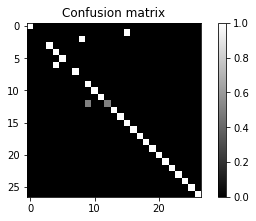

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_true = [-1]*NUM_TEST_EXAMPLES
y_pred = [-1]*NUM_TEST_EXAMPLES
y_closest = [-1]*NUM_TEST_EXAMPLES
for i in range(NUM_TEST_EXAMPLES):
    y_true[i] = y_test[i]
    y_pred[i], y_closest[i] = predict_face_id(i)

print("Accuracy score : {}".format(accuracy_score(y_true, y_pred)))

fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('Confusion matrix')
plt.imshow(confusion_matrix(y_true, y_pred, normalize='true'))
ax.set_aspect('equal')
plt.colorbar(orientation='vertical')

### Visualization Result

#### Correct Prediction

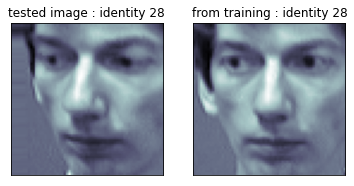

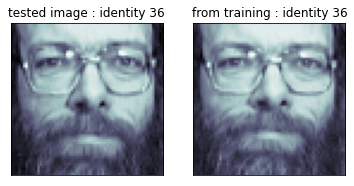

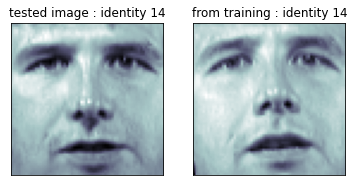

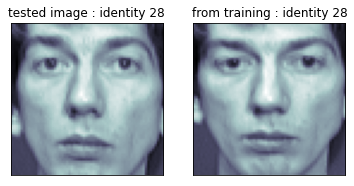

In [15]:
truth_array = np.asarray(y_true) == np.asarray(y_pred)
# visualize 3 faces with a correct match
correct_match = np.argwhere(truth_array == True).flatten()
for i in correct_match[:4]:
    show_prediction(i, y_closest[i])

#### Incorrect Prediction

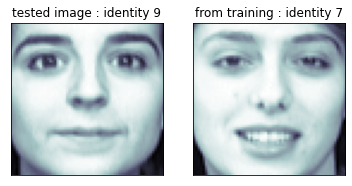

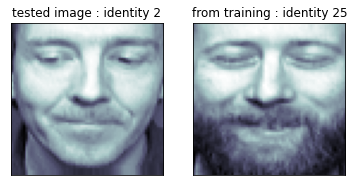

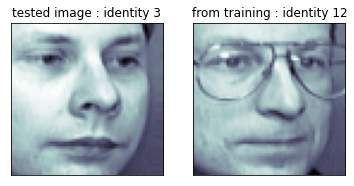

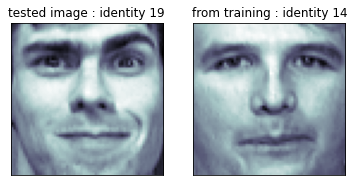

In [16]:
# visualize 3 faces with a incorrect match
incorrect_match = np.argwhere(truth_array == False).flatten()
for i in incorrect_match[:4]:
    show_prediction(i, y_closest[i])

## Limitation of EigenFaces


EigenFaces algoritm suffers from many limitations:
- Eigenfaces performance decreases for recognition under different pose & lighting. 
- Eigenfaces is very sensitive to scale, so a low-level pre-processing is vital for scale.
- Face images tested in the experiments are taken in the uniform background, while this situation is not suitable in natural scene.


## References

- [1] Sirovich, Lawrence, and Michael Kirby. "Low-dimensional procedure for the characterization of human faces." Josa a 4, no. 3 (1987): 519-524.
- [2] Turk, Matthew A., and Alex P. Pentland. "Face recognition using eigenfaces." In Proceedings. 1991 IEEE computer society conference on computer vision and pattern recognition, pp. 586-587. IEEE Computer Society, 1991.
- [3] üge Çarıkçı, M., and Figen Özen. "A face recognition system based on eigenfaces method." Procedia Technology 1 (2012): 118-123.
- [4] http://www.scholarpedia.org/article/Eigenfaces
- [5] Images from AT&T Laboratories Cambridge.
https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html